In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("2022-2023 Football Player Stats (1).xlsx")

Football Team Selector based on Tactical Approach
Available tactics:
1. Tiki-Taka (4-3-3) - Emphasizes short passing and movement, working the ball through various channels.
2. Counter-Attack (4-2-3-1) - Focuses on quick transitions from defense to attack.
3. Park the Bus (5-4-1) - Ultra-defensive approach with emphasis on defensive solidity.
4. Gegenpressing (4-4-2) - High pressing to immediately win back possession after losing the ball.
5. Total Football (3-4-3) - Versatile players who can play multiple positions with fluid movement.

=== Best Team for Park the Bus (5-4-1 formation) ===
Tactic Description: Ultra-defensive approach with emphasis on defensive solidity.

Goalkeeper:
- Jan Jakob Olschowsky (M'Gladbach)

Defenders:
- Marlos Moreno (Troyes) - MFDF
- Giulian Biancone (Nott'ham Forest) - DF
- Festy Ebosele (Udinese) - DF
- Jack Stephens (Southampton) - DF
- Matías Viña (Roma) - DF

Midfielders:
- Josh Onomah (Fulham) - MF
- Albert Sambi Lokonga (Crystal Palace) - MF
- Paul 

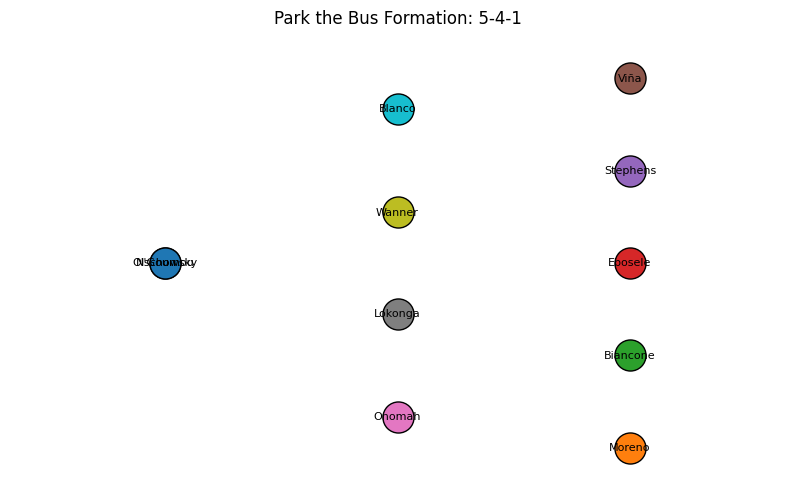


Cluster Visualizations:


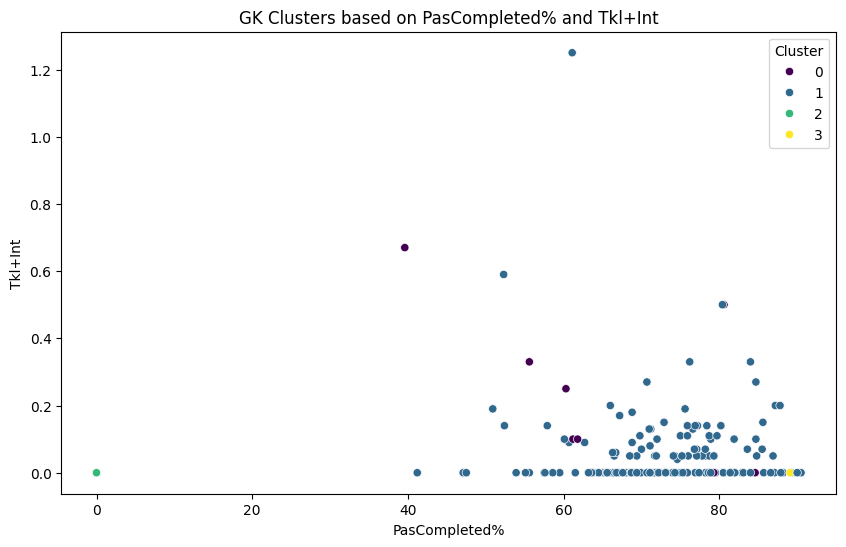


Average stats per cluster for GKs:
         Goals    Shots   SoT  SoT%  G/Sh  G/SoT   Assists  PasCompleted%  \
Cluster                                                                     
0          0.0  0.00000  0.00   0.0   0.0    0.0  0.006250      65.375000   
1          0.0  0.00039  0.00   0.0   0.0    0.0  0.002078      72.451948   
2          0.0  0.00000  0.00   0.0   0.0    0.0  0.000000       0.000000   
3          0.0  0.17000  0.08  50.0   0.0    0.0  0.000000      89.100000   

         Progressive_PassesDist  ShortPasses%  ...    Carries   CarProg  \
Cluster                                        ...                        
0                    638.025000     99.650000  ...  22.850000  0.000000   
1                    505.800649     99.016234  ...  22.097403  0.000325   
2                      0.000000      0.000000  ...   0.000000  0.000000   
3                    606.700000    100.000000  ...  28.200000  0.000000   

            Recov     AerWon%      CrdY      CrdR 

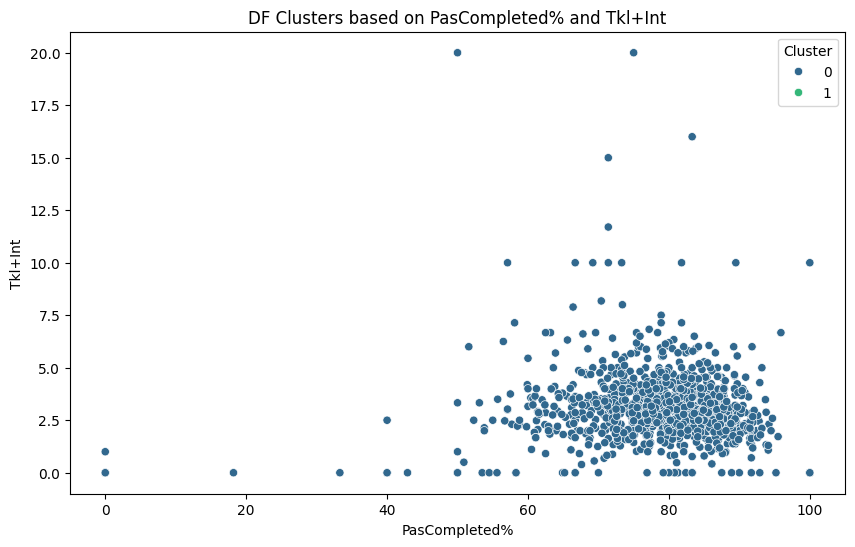


Average stats per cluster for DFs:
           Goals     Shots       SoT       SoT%      G/Sh     G/SoT   Assists  \
Cluster                                                                         
0        0.43128  0.686161  0.191166  21.802085  0.057773  0.152275  0.054777   
1        0.00000  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   

         PasCompleted%  Progressive_PassesDist  ShortPasses%  ...    Carries  \
Cluster                                                       ...              
0            78.248626              257.925687     86.733081  ...  35.198379   
1            66.700000              135.000000     33.300000  ...  30.000000   

         CarProg     Recov    AerWon%       CrdY      CrdR        Fls  \
Cluster                                                                 
0        1.49509  5.500199  50.674976   0.223991  0.015393   1.133621   
1        0.00000  0.000000   0.000000  10.000000  5.000000  10.000000   

         FlsDrawn       O

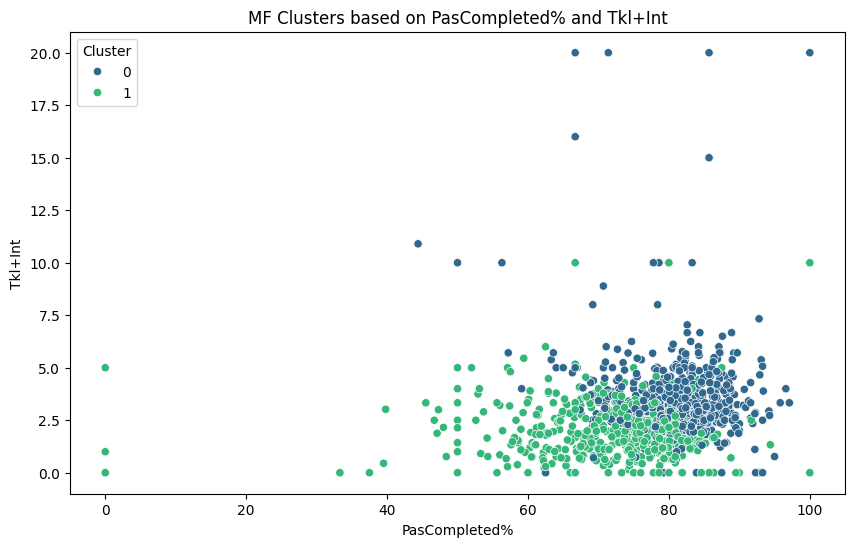


Average stats per cluster for MFs:
            Goals     Shots       SoT       SoT%      G/Sh     G/SoT  \
Cluster                                                                
0        0.634429  1.152998  0.342418  23.602515  0.044449  0.129652   
1        1.716390  1.984770  0.722007  31.063168  0.087827  0.233941   

          Assists  PasCompleted%  Progressive_PassesDist  ShortPasses%  ...  \
Cluster                                                                 ...   
0        0.081973      81.399613              201.522631     87.274662  ...   
1        0.144438      70.758748               90.723812     78.463720  ...   

           Carries   CarProg     Recov    AerWon%      CrdY      CrdR  \
Cluster                                                                 
0        38.954603  1.700561  6.989458  42.681625  0.309072  0.032921   
1        26.636464  2.255212  4.218766  31.005157  0.248343  0.007845   

              Fls  FlsDrawn       Off       Crs  
Cluster        

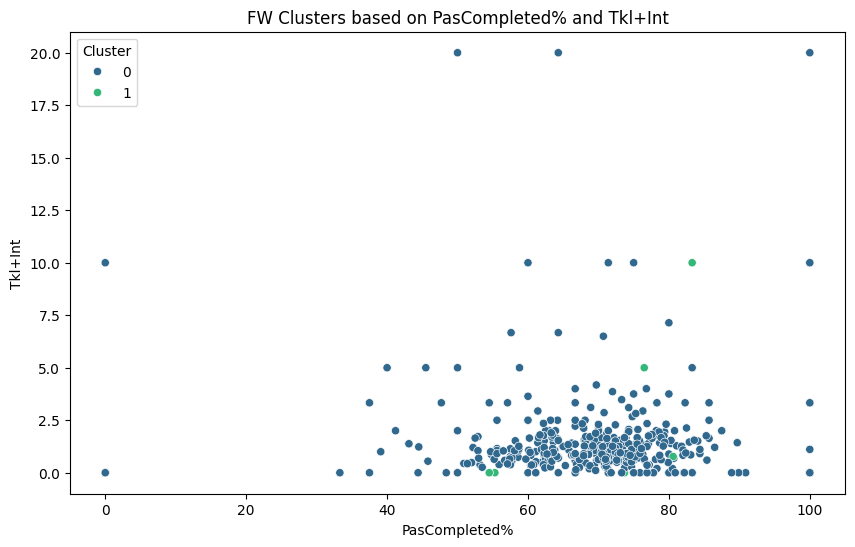


Average stats per cluster for FWs:
            Goals    Shots       SoT       SoT%      G/Sh     G/SoT   Assists  \
Cluster                                                                         
0        2.613466  2.30409  0.833591  32.366833  0.102344  0.237805  0.113392   
1        0.000000  3.50250  0.096250   4.162500  0.000000  0.000000  0.000000   

         PasCompleted%  Progressive_PassesDist  ShortPasses%  ...   Carries  \
Cluster                                                       ...             
0            68.617207               54.947855       76.1399  ...  22.60192   
1            72.775000              265.587500       82.8625  ...  69.88750   

           CarProg     Recov    AerWon%      CrdY      CrdR       Fls  \
Cluster                                                                 
0         1.847257  3.395561  34.083791  0.261372  0.006933  1.516359   
1        11.950000  4.581250  25.000000  0.803750  0.000000  1.175000   

         FlsDrawn       Off  

In [3]:
# Data Cleaning
df = df.dropna(subset=['Pos'])

def simplify_position(pos):
    if pd.isna(pos):
        return None
    pos = str(pos).upper()
    if 'GK' in pos:
        return 'GK'
    elif 'DF' in pos or 'FB' in pos or 'WB' in pos:
        return 'DF'
    elif 'MF' in pos or 'DM' in pos or 'CM' in pos or 'AM' in pos:
        return 'MF'
    elif 'FW' in pos or 'ST' in pos or 'CF' in pos or 'WF' in pos:
        return 'FW'
    else:
        return 'MF'

df['Main_Pos'] = df['Pos'].apply(simplify_position)

features = [
    'Goals', 'Shots', 'SoT', 'SoT%', 'G/Sh', 'G/SoT', 'Assists', 'PasCompleted%',
    'Progressive_PassesDist', 'ShortPasses%', 'MediumPasses%', 'LongPasses%',
    'PassesLeadingtoShot', 'Passesintofinal3rd', 'Crossesintothebox', 'TklDef3rd',
    'TklMid3rd', 'TklAtt3rd', 'DribblersTackeled%', 'Blocks', 'Int', 'Tkl+Int',
    'Clr', 'Touches', 'TakeOns_Suc%', 'Carries', 'CarProg', 'Recov', 'AerWon%',
    'CrdY', 'CrdR', 'Fls', 'FlsDrawn', 'Off', 'Crs'
]

scaler = StandardScaler()

def find_optimal_clusters(data, max_k=10):
    silhouette_scores = []
    for k in range(2, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        score = silhouette_score(data, kmeans.labels_)
        silhouette_scores.append(score)
    return np.argmax(silhouette_scores) + 2

position_clusters = {}
position_centroids = {}

for position in ['GK', 'DF', 'MF', 'FW']:
    position_data = df[df['Main_Pos'] == position]

    if len(position_data) < 5:
        continue

    X = position_data[features].fillna(0)
    X_scaled = scaler.fit_transform(X)

    optimal_k = find_optimal_clusters(X_scaled)

    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)

    position_data = position_data.copy()
    position_data.loc[:, 'Cluster'] = clusters
    position_clusters[position] = position_data
    position_centroids[position] = kmeans.cluster_centers_

tactics = {
    'Tiki-Taka': {
        'priority': ['PasCompleted%', 'ShortPasses%', 'Passesintofinal3rd', 'Progressive_PassesDist'],
        'formation': '4-3-3',
        'description': 'Emphasizes short passing and movement, working the ball through various channels.'
    },
    'Counter-Attack': {
        'priority': ['Recov', 'Int', 'Tkl+Int', 'Assists', 'CarProg'],
        'formation': '4-2-3-1',
        'description': 'Focuses on quick transitions from defense to attack.'
    },
    'Park the Bus': {
        'priority': ['TklDef3rd', 'Blocks', 'Clr', 'AerWon%', 'Tkl+Int'],
        'formation': '5-4-1',
        'description': 'Ultra-defensive approach with emphasis on defensive solidity.'
    },
    'Gegenpressing': {
        'priority': ['Recov', 'TklMid3rd', 'TklAtt3rd', 'DribblersTackeled%', 'PassesLeadingtoShot'],
        'formation': '4-4-2',
        'description': 'High pressing to immediately win back possession after losing the ball.'
    },
    'Total Football': {
        'priority': ['PasCompleted%', 'Progressive_PassesDist', 'TakeOns_Suc%', 'CarProg', 'Assists'],
        'formation': '3-4-3',
        'description': 'Versatile players who can play multiple positions with fluid movement.'
    }
}

# Function to select best players from clusters based on tactic
def select_team(tactic, num_players=11):
    # priorities
    priorities = tactics[tactic]['priority']

    # formation
    formation = tactics[tactic]['formation']
    formation_parts = list(map(int, formation.split('-')))

    # Calculate number of players needed for each position
    if len(formation_parts) == 3:  # 4-3-3
        num_df = formation_parts[0]
        num_mf = formation_parts[1]
        num_fw = formation_parts[2]
    elif len(formation_parts) == 4:  # 4-2-3-1
        num_df = formation_parts[0]
        num_mf = formation_parts[1] + formation_parts[2]  
        num_fw = formation_parts[3]
    else:  # default 4-4-2
        num_df = 4
        num_mf = 4
        num_fw = 2

    selected_players = []

    # Goalkeeper
    if 'GK' in position_clusters:
        gk_clusters = position_clusters['GK']
        # Find best GK based on clean sheets, saves, etc. (we'll use Recov and AerWon% as proxies)
        best_gk = gk_clusters.sort_values(by=['Recov', 'AerWon%', 'PasCompleted%'], ascending=False).iloc[0]
        selected_players.append(best_gk.to_dict())

    # Defenders
    if 'DF' in position_clusters:
        df_clusters = position_clusters['DF']
        # Score defenders based on tactic priorities
        for feature in priorities:
            if feature in df_clusters.columns:
                df_clusters[feature] = pd.to_numeric(df_clusters[feature], errors='coerce')
        df_clusters = df_clusters.fillna(0)

        # Create a score based on priorities
        df_clusters['Score'] = 0
        for i, feature in enumerate(priorities):
            if feature in df_clusters.columns:
                df_clusters['Score'] += (len(priorities) - i) * df_clusters[feature]

        # Get top defenders
        top_defenders = df_clusters.sort_values('Score', ascending=False).head(num_df * 2)  # Get extra for variety

        # Select a balanced defense (some more defensive, some more offensive)
        defensive_defenders = top_defenders.sort_values(by=['TklDef3rd', 'Blocks', 'Clr'], ascending=False).head(num_df // 2)
        offensive_defenders = top_defenders.sort_values(by=['Passesintofinal3rd', 'Assists', 'Crossesintothebox'], ascending=False).head(num_df - (num_df // 2))

        selected_defenders = pd.concat([defensive_defenders, offensive_defenders]).drop_duplicates().head(num_df)
        selected_players.extend(selected_defenders.to_dict('records'))

    # Midfielders
    if 'MF' in position_clusters:
        mf_clusters = position_clusters['MF']
        # Score midfielders based on tactic priorities
        for feature in priorities:
            if feature in mf_clusters.columns:
                mf_clusters[feature] = pd.to_numeric(mf_clusters[feature], errors='coerce')
        mf_clusters = mf_clusters.fillna(0)

        mf_clusters['Score'] = 0
        for i, feature in enumerate(priorities):
            if feature in mf_clusters.columns:
                mf_clusters['Score'] += (len(priorities) - i) * mf_clusters[feature]

        # Get top midfielders
        top_midfielders = mf_clusters.sort_values('Score', ascending=False).head(num_mf * 2)

        # Select a balanced midfield based on tactic
        if tactic == 'Counter-Attack':
            selected_midfielders = top_midfielders.sort_values(by=['Recov', 'CarProg', 'Assists'], ascending=False).head(num_mf)
        elif tactic == 'Tiki-Taka':
            selected_midfielders = top_midfielders.sort_values(by=['PasCompleted%', 'Passesintofinal3rd', 'Progressive_PassesDist'], ascending=False).head(num_mf)
        else:
            selected_midfielders = top_midfielders.head(num_mf)

        selected_players.extend(selected_midfielders.to_dict('records'))

    # Forwards
    if 'FW' in position_clusters:
        fw_clusters = position_clusters['FW']
        # Score forwards based on tactic priorities
        for feature in priorities:
            if feature in fw_clusters.columns:
                fw_clusters[feature] = pd.to_numeric(fw_clusters[feature], errors='coerce')
        fw_clusters = fw_clusters.fillna(0)

        fw_clusters['Score'] = 0
        for i, feature in enumerate(priorities):
            if feature in fw_clusters.columns:
                fw_clusters['Score'] += (len(priorities) - i) * fw_clusters[feature]

        # Get top forwards
        top_forwards = fw_clusters.sort_values('Score', ascending=False).head(num_fw * 2)

        # Select forwards based on tactic
        if tactic == 'Counter-Attack':
            selected_forwards = top_forwards.sort_values(by=['Goals', 'TakeOns_Suc%', 'CarProg'], ascending=False).head(num_fw)
        elif tactic == 'Park the Bus':
            selected_forwards = top_forwards.sort_values(by=['Recov', 'TklAtt3rd', 'Goals'], ascending=False).head(num_fw)
        else:
            selected_forwards = top_forwards.head(num_fw)

        selected_players.extend(selected_forwards.to_dict('records'))

    team_df = pd.DataFrame(selected_players)
    if len(team_df) == 0:
        return pd.DataFrame(columns=df.columns)  # Return empty DataFrame if no players selected

    team_df = team_df.drop_duplicates(subset=['Player'])

    if len(team_df) > num_players:
        team_df = team_df.head(num_players)
    elif len(team_df) < num_players:
        
        remaining = num_players - len(team_df)
        all_players = pd.concat([position_clusters[pos] for pos in position_clusters])
        all_players = all_players[~all_players['Player'].isin(team_df['Player'])]

        # Score all players based on tactic priorities
        for feature in priorities:
            if feature in all_players.columns:
                all_players[feature] = pd.to_numeric(all_players[feature], errors='coerce')
        all_players = all_players.fillna(0)

        all_players['Score'] = 0
        for i, feature in enumerate(priorities):
            if feature in all_players.columns:
                all_players['Score'] += (len(priorities) - i) * all_players[feature]

        extra_players = all_players.sort_values('Score', ascending=False).head(remaining)
        team_df = pd.concat([team_df, extra_players])

    return team_df

# Function to visualize clusters
def visualize_clusters(position):
    if position not in position_clusters:
        print(f"No data available for {position}")
        return

    data = position_clusters[position]

    feature1 = 'PasCompleted%' if 'PasCompleted%' in data.columns else data.columns[6]
    feature2 = 'Tkl+Int' if 'Tkl+Int' in data.columns else data.columns[7]

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x=feature1, y=feature2, hue='Cluster', palette='viridis')
    plt.title(f'{position} Clusters based on {feature1} and {feature2}')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.show()

    # cluster characteristics
    cluster_stats = data.groupby('Cluster')[features].mean()
    print(f"\nAverage stats per cluster for {position}s:")
    print(cluster_stats)

# display team
def display_team(team_df, tactic):
    formation = tactics[tactic]['formation']
    description = tactics[tactic]['description']

    print(f"\n=== Best Team for {tactic} ({formation} formation) ===")
    print(f"Tactic Description: {description}\n")

    # Group by position
    gk = team_df[team_df['Main_Pos'] == 'GK']
    defenders = team_df[team_df['Main_Pos'] == 'DF']
    midfielders = team_df[team_df['Main_Pos'] == 'MF']
    forwards = team_df[team_df['Main_Pos'] == 'FW']

    print("Goalkeeper:")
    for _, player in gk.iterrows():
        print(f"- {player['Player']} ({player['Team']})")

    print("\nDefenders:")
    for _, player in defenders.iterrows():
        print(f"- {player['Player']} ({player['Team']}) - {player['Pos']}")

    print("\nMidfielders:")
    for _, player in midfielders.iterrows():
        print(f"- {player['Player']} ({player['Team']}) - {player['Pos']}")

    print("\nForwards:")
    for _, player in forwards.iterrows():
        print(f"- {player['Player']} ({player['Team']}) - {player['Pos']}")

    # team formation
    plt.figure(figsize=(10, 6))

    # positions
    if formation == '4-3-3':
        positions = {
            'GK': [(0, 0)],
            'DF': [(-3, -1), (-3, -0.33), (-3, 0.33), (-3, 1)],
            'MF': [(-1.5, -0.66), (-1.5, 0), (-1.5, 0.66)],
            'FW': [(0, -1), (0, 0), (0, 1)]
        }
    elif formation == '4-2-3-1':
        positions = {
            'GK': [(0, 0)],
            'DF': [(-3, -1), (-3, -0.33), (-3, 0.33), (-3, 1)],
            'MF': [(-2, -0.5), (-2, 0.5), (-1, -0.8), (-1, 0), (-1, 0.8)],
            'FW': [(0, 0)]
        }
    elif formation == '5-4-1':
        positions = {
            'GK': [(0, 0)],
            'DF': [(-3, -1.2), (-3, -0.6), (-3, 0), (-3, 0.6), (-3, 1.2)],
            'MF': [(-1.5, -1), (-1.5, -0.33), (-1.5, 0.33), (-1.5, 1)],
            'FW': [(0, 0)]
        }
    elif formation == '4-4-2':
        positions = {
            'GK': [(0, 0)],
            'DF': [(-3, -1), (-3, -0.33), (-3, 0.33), (-3, 1)],
            'MF': [(-1.5, -1), (-1.5, -0.33), (-1.5, 0.33), (-1.5, 1)],
            'FW': [(0, -0.5), (0, 0.5)]
        }
    else:  # 3-4-3
        positions = {
            'GK': [(0, 0)],
            'DF': [(-3, -0.66), (-3, 0), (-3, 0.66)],
            'MF': [(-1.5, -1), (-1.5, -0.33), (-1.5, 0.33), (-1.5, 1)],
            'FW': [(0, -1), (0, 0), (0, 1)]
        }

    # Plot field
    plt.xlim(-4, 1)
    plt.ylim(-1.5, 1.5)
    plt.gca().invert_xaxis()
    plt.axis('off')

    # Plot players
    for pos_type, coords in positions.items():
        players = []
        if pos_type == 'GK':
            players = gk.to_dict('records')
        elif pos_type == 'DF':
            players = defenders.to_dict('records')
        elif pos_type == 'MF':
            players = midfielders.to_dict('records')
        else:
            players = forwards.to_dict('records')

        for (x, y), player in zip(coords, players[:len(coords)]):
            plt.scatter(x, y, s=500, edgecolors='black')
            last_name = player['Player'].split()[-1] if isinstance(player['Player'], str) else 'Player'
            plt.text(x, y, last_name, ha='center', va='center', fontsize=8)

    plt.title(f"{tactic} Formation: {formation}")
    plt.show()

def main():
    print("Football Team Selector based on Tactical Approach")
    print("Available tactics:")
    for i, tactic in enumerate(tactics.keys(), 1):
        print(f"{i}. {tactic} ({tactics[tactic]['formation']}) - {tactics[tactic]['description']}")

    # tactic selection
    while True:
        try:
            choice = int(input("\nSelect a tactic (1-5): "))
            if 1 <= choice <= len(tactics):
                selected_tactic = list(tactics.keys())[choice-1]
                break
            else:
                print("Please enter a number between 1 and 5")
        except ValueError:
            print("Please enter a valid number")

    # display team
    team = select_team(selected_tactic)
    display_team(team, selected_tactic)

    print("\nCluster Visualizations:")
    for position in ['GK', 'DF', 'MF', 'FW']:
        visualize_clusters(position)

    # Player Stats
    print("\nKey Player Statistics:")
    print(team[['Player', 'Pos', 'Team', 'Goals', 'Assists', 'PasCompleted%', 'Tkl+Int']].sort_values('Pos'))

if __name__ == "__main__":
    main()